<a href="https://colab.research.google.com/github/edwarddramirez/taxi-forecast/blob/main/scratch/Naz_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/taxi_colab', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)

Mounted at /content/mnt


In [ ]:
#!ls "/content/mnt/My Drive"

 2020_BUSYDAIS_Client_Client_Copy_Return_1120S.pdf  'Nazanin Komeilizadeh_resume (1).pdf'
'Capstone 2.gdoc'				    'Nazanin Komeilizadeh_resume.pdf'
'Colab Notebooks'				     questions.pdf
'Getting started.pdf'				     SecureMessageAtt.html
 Insight_DS.LA_Acceptance_Letter_19B.pdf	     taxi_colab
 Komeilizadeh_CoC.pdf				     yellow_tripdata_2022-01.parquet
 NazaninKomeilizadeh_2022.pdf


In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

2.3.1+cu121


In [ ]:
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

In [ ]:
import torch_geometric
import torch_geometric_temporal

In [ ]:
!pip install libpysal

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 35.8 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import networkx as nx
import libpysal as lp
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd


In [ ]:
df_y = pd.read_csv('/content/mnt/MyDrive/taxi_colab/test.csv')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_y.head()

Unnamed: 0  VendorID      pickup_datetime     dropoff_datetime  \
0           0         2  2023-01-01 00:32:10  2023-01-01 00:40:36   
1           1         2  2023-01-01 00:55:08  2023-01-01 01:01:27   
2           2         2  2023-01-01 00:25:04  2023-01-01 00:37:49   
3           3         1  2023-01-01 00:03:48  2023-01-01 00:13:25   
4           4         2  2023-01-01 00:10:29  2023-01-01 00:21:19   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.97         1.0                  N   
1              1.0           1.10         1.0                  N   
2              1.0           2.51         1.0                  N   
3              0.0           1.90         1.0                  N   
4              1.0           1.43         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           161           141             2          9.3   1.00      0.5   
1            43           237             1          7.9   1.00      0.5   
2            48           238             1         14.9   1.00      0.5   
3           138             7             1         12.1   7.25      0.5   
4           107            79             1         11.4   1.00      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        0.00           0.0                    1.0         14.30   
1        4.00           0.0                    1.0         16.90   
2       15.00           0.0                    1.0         34.90   
3        0.00           0.0                    1.0         20.85   
4        3.28           0.0                    1.0         19.68   

   congestion_surcharge  airport_fee  
0                   2.5         0.00  
1                   2.5         0.00  
2                   2.5         0.00  
3                   0.0         1.25  
4                   2.5         0.00

In [ ]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066718 entries, 0 to 3066717
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   pickup_datetime        object 
 3   dropoff_datetime       object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 467.9+ MB


In [ ]:
# we have 261 DO locations overall
df_y['DOLocationID'].nunique()

261

In [ ]:
df_y['PULocationID'].isna().sum()

0

In [ ]:
df_y['DOLocationID'].isna().sum()

0

In [ ]:
df_y.VendorID.unique()

array([2, 1])

In [ ]:
df_y.RatecodeID.unique()

array([ 1.,  2.,  4., 99.,  5.,  3.,  6., nan])

In [ ]:
cols_to_drop = ["Unnamed: 0", "VendorID", "store_and_fwd_flag", "extra", "mta_tax",
                "improvement_surcharge", "tip_amount", "tolls_amount", "fare_amount", "airport_fee"]
# RateCodeID (I need to check to see if Manhattan has only one code; if so, drop it)
df_y.dropna(inplace=True)
df_y.drop(cols_to_drop, axis=1, inplace=True)
df_y.head()

pickup_datetime     dropoff_datetime  passenger_count  trip_distance  \
0  2023-01-01 00:32:10  2023-01-01 00:40:36              1.0           0.97   
1  2023-01-01 00:55:08  2023-01-01 01:01:27              1.0           1.10   
2  2023-01-01 00:25:04  2023-01-01 00:37:49              1.0           2.51   
3  2023-01-01 00:03:48  2023-01-01 00:13:25              0.0           1.90   
4  2023-01-01 00:10:29  2023-01-01 00:21:19              1.0           1.43   

   RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
0         1.0           161           141             2         14.30   
1         1.0            43           237             1         16.90   
2         1.0            48           238             1         34.90   
3         1.0           138             7             1         20.85   
4         1.0           107            79             1         19.68   

   congestion_surcharge  
0                   2.5  
1                   2.5  
2                   2.5  
3                   0.0  
4                   2.5

In [ ]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2994975 entries, 0 to 2994974
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   pickup_datetime       object 
 1   dropoff_datetime      object 
 2   passenger_count       float64
 3   trip_distance         float64
 4   RatecodeID            float64
 5   PULocationID          int64  
 6   DOLocationID          int64  
 7   payment_type          int64  
 8   total_amount          float64
 9   congestion_surcharge  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 251.3+ MB


In [ ]:
# number of PU locations
df_y['PULocationID'].nunique()

256

In [ ]:
# 2648099 rows for only MH area
df_y[df_y['PULocationID'].isin([4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
        79,  87,  88,  90, 100, 107, 113, 114, 116, 120, 125, 127, 128,
       137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163,
       164, 166, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234,
       236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]) ]

pickup_datetime     dropoff_datetime  passenger_count  \
0        2023-01-01 00:32:10  2023-01-01 00:40:36              1.0   
1        2023-01-01 00:55:08  2023-01-01 01:01:27              1.0   
2        2023-01-01 00:25:04  2023-01-01 00:37:49              1.0   
4        2023-01-01 00:10:29  2023-01-01 00:21:19              1.0   
5        2023-01-01 00:50:34  2023-01-01 01:02:52              1.0   
...                      ...                  ...              ...   
2994966  2023-01-31 23:09:30  2023-01-31 23:19:28              2.0   
2994971  2023-01-31 23:14:38  2023-01-31 23:25:30              1.0   
2994972  2023-01-31 23:44:51  2023-01-31 23:58:45              1.0   
2994973  2023-01-31 23:45:00  2023-01-31 23:55:46              2.0   
2994974  2023-01-31 23:22:47  2023-01-31 23:26:24              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 0.97         1.0           161           141             2   
1                 1.10         1.0            43           237             1   
2                 2.51         1.0            48           238             1   
4                 1.43         1.0           107            79             1   
5                 1.84         1.0           161           137             1   
...                ...         ...           ...           ...           ...   
2994966           1.74         1.0           113            68             1   
2994971           3.37         1.0           263           107             1   
2994972           2.86         1.0            79           246             1   
2994973           3.80         1.0            68           238             1   
2994974           0.60         1.0           236           262             2   

         total_amount  congestion_surcharge  
0               14.30                   2.5  
1               16.90                   2.5  
2               34.90                   2.5  
4               19.68                   2.5  
5               27.80                   2.5  
...               ...                   ...  
2994966         19.68                   2.5  
2994971         22.60                   2.5  
2994972         23.30                   2.5  
2994973         25.20                   2.5  
2994974         10.80                   2.5  

[2648099 rows x 10 columns]

In [ ]:
# list of Manhattan zones that we kept:
# [ 4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
#         79,  87,  88,  90, 100, 107, 113, 114, 116, 120, 125, 127, 128,
#        137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163,
#        164, 166, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234,
#        236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

In [ ]:
condition_1 = (df_y['PULocationID'].isin([4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
        79,  87,  88,  90, 100, 107, 113, 114, 116, 120, 125, 127, 128,
       137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163,
       164, 166, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234,
       236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]))

In [ ]:
condition_2 = (df_y['DOLocationID'].isin([4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
        79,  87,  88,  90, 100, 107, 113, 114, 116, 120, 125, 127, 128,
       137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163,
       164, 166, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234,
       236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]))

In [ ]:
df_y_MH = df_y[condition_1 & condition_2 ]

In [ ]:
df_y_MH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481683 entries, 0 to 2994974
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   pickup_datetime       object 
 1   dropoff_datetime      object 
 2   passenger_count       float64
 3   trip_distance         float64
 4   RatecodeID            float64
 5   PULocationID          int64  
 6   DOLocationID          int64  
 7   payment_type          int64  
 8   total_amount          float64
 9   congestion_surcharge  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 208.3+ MB


In [ ]:
# 513292 were excluded from the dataset
2994975 - 2481683

513292

In [ ]:
df_y_MH.head()

pickup_datetime     dropoff_datetime  passenger_count  trip_distance  \
0  2023-01-01 00:32:10  2023-01-01 00:40:36              1.0           0.97   
1  2023-01-01 00:55:08  2023-01-01 01:01:27              1.0           1.10   
2  2023-01-01 00:25:04  2023-01-01 00:37:49              1.0           2.51   
4  2023-01-01 00:10:29  2023-01-01 00:21:19              1.0           1.43   
5  2023-01-01 00:50:34  2023-01-01 01:02:52              1.0           1.84   

   RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
0         1.0           161           141             2         14.30   
1         1.0            43           237             1         16.90   
2         1.0            48           238             1         34.90   
4         1.0           107            79             1         19.68   
5         1.0           161           137             1         27.80   

   congestion_surcharge  
0                   2.5  
1                   2.5  
2                   2.5  
4                   2.5  
5                   2.5

In [ ]:
df_y_MH.shape

(2481683, 10)

In [ ]:
df_y_MH['pickup_datetime'].min()

'2023-01-01 00:00:05'

In [ ]:
df_y_MH['pickup_datetime'].max()

'2023-01-31 23:59:59'

In [ ]:
df_y_MH['RatecodeID'].unique()

array([ 1.,  2.,  5., 99.,  3.,  6.,  4.])

In [ ]:
df_y_MH['RatecodeID'].value_counts()

1.0     2469814
5.0        5513
2.0        4607
99.0        984
3.0         715
4.0          47
6.0           3
Name: RatecodeID, dtype: int64

In [ ]:
df_y_MH['payment_type'].unique()

array([2, 1, 4, 3])

In [ ]:
df_y_MH['payment_type'].isna().sum()

0

In [ ]:

df_y_MH['congestion_surcharge'].unique()

array([ 2.5,  0. , -2.5])

In [ ]:
df_y_MH['congestion_surcharge'].value_counts()

 2.5    2419572
 0.0      44837
-2.5      17274
Name: congestion_surcharge, dtype: int64

In [ ]:
df_y_MH.isna().sum()

pickup_datetime         0
dropoff_datetime        0
passenger_count         0
trip_distance           0
RatecodeID              0
PULocationID            0
DOLocationID            0
payment_type            0
total_amount            0
congestion_surcharge    0
dtype: int64

In [ ]:
locations = df_y_MH['PULocationID'].unique()

In [ ]:
locations

array([161,  43,  48, 107, 239, 164, 141, 234,  79,  90, 237, 143, 137,
       163,  68, 263, 170, 233, 236, 144, 229, 249, 162, 224, 142, 151,
       211, 148, 238, 231,  13, 262,  75, 125, 186, 158, 246,  50,   4,
        87, 114,  24, 166,  41, 113, 140,  74,  88, 232, 261,  45, 116,
       209, 243, 100, 244,  42,  12, 230, 152, 127, 128, 120])

In [ ]:
len(locations)
# 63 pickup location taxi zones

63

In [ ]:
new_ids = list(range(len(df_y_MH['PULocationID'].unique())))
zip(locations, new_ids)
dict(zip(locations, new_ids))

{161: 0,
 43: 1,
 48: 2,
 107: 3,
 239: 4,
 164: 5,
 141: 6,
 234: 7,
 79: 8,
 90: 9,
 237: 10,
 143: 11,
 137: 12,
 163: 13,
 68: 14,
 263: 15,
 170: 16,
 233: 17,
 236: 18,
 144: 19,
 229: 20,
 249: 21,
 162: 22,
 224: 23,
 142: 24,
 151: 25,
 211: 26,
 148: 27,
 238: 28,
 231: 29,
 13: 30,
 262: 31,
 75: 32,
 125: 33,
 186: 34,
 158: 35,
 246: 36,
 50: 37,
 4: 38,
 87: 39,
 114: 40,
 24: 41,
 166: 42,
 41: 43,
 113: 44,
 140: 45,
 74: 46,
 88: 47,
 232: 48,
 261: 49,
 45: 50,
 116: 51,
 209: 52,
 243: 53,
 100: 54,
 244: 55,
 42: 56,
 12: 57,
 230: 58,
 152: 59,
 127: 60,
 128: 61,
 120: 62}

In [ ]:
# Reassign the PUlocation IDs (makes it easier later, because in the dataset the IDs didn't start at 0)
#locations = df_y_MH['PULocationID'].unique()
#new_ids = list(range(len(df_y_MH['PULocationID'].unique())))
mapping = dict(zip(locations, new_ids))

In [ ]:
df_y_MH['PULocationID'] = df_y_MH['PULocationID'].map(mapping)
df_y_MH['DOLocationID'] = df_y_MH['DOLocationID'].map(mapping)
df_y_MH.head()

<ipython-input-25-f6aa2309f828>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_MH['PULocationID'] = df_y_MH['PULocationID'].map(mapping)
<ipython-input-25-f6aa2309f828>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_MH['DOLocationID'] = df_y_MH['DOLocationID'].map(mapping)


pickup_datetime     dropoff_datetime  passenger_count  trip_distance  \
0  2023-01-01 00:32:10  2023-01-01 00:40:36              1.0           0.97   
1  2023-01-01 00:55:08  2023-01-01 01:01:27              1.0           1.10   
2  2023-01-01 00:25:04  2023-01-01 00:37:49              1.0           2.51   
4  2023-01-01 00:10:29  2023-01-01 00:21:19              1.0           1.43   
5  2023-01-01 00:50:34  2023-01-01 01:02:52              1.0           1.84   

   RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
0         1.0             0             6             2         14.30   
1         1.0             1            10             1         16.90   
2         1.0             2            28             1         34.90   
4         1.0             3             8             1         19.68   
5         1.0             0            12             1         27.80   

   congestion_surcharge  
0                   2.5  
1                   2.5  
2                   2.5  
4                   2.5  
5                   2.5

In [ ]:
# We could use the above dataset to either predict the trip duration between two locations,
# based on the surrounding (structural) and temporal trip durations or to predict the demand in terms of how many taxis we expect on a route.

# Nodes - The locations between which the taxi travel (PULocationID and DOLocationID)
# Node Features - Attributes about a location, for example average number of taxi rides that start / end here,
# average traffic, ... (whatever is available)

# For this dataset, we the edge (adjacency) is the 'trip_distance'.

# Edges / Edge weights - Proximity between two addresses (available) / Connection according to road network (not available here)
# Labels - The trip duration, which makes it a link-prediction task


# Temporal: tpep_pickup_datetime, tpep_dropoff_datetime
# Edge: Trip_distance
# Edge features: Passenger_count, Payment_type, Total_amount, Congestion_Surcharge (the Total_amount includes this amount so I think we should drop it. However, I am not too sure if it‚Äôs better to keep the granular level data for various charges or is it better to keep the Total_amount, which is the aggregate of the various charges?)
# Nodes: PULocationID, DOLocationID


# For the temporal part, we need to define a stepsize for the temporal snapshots.
# In the dataset above we have random trips from one location to another, without a pre-defined discrete interval.
# An easy approach is for example to define X minute intervals and build a graph out of all trips that happened (ended)
# in this timeframe. The "ended" part is important, because we don't want to leak information into the future timesteps.

# Timesteps - 60 min steps (we have 1 month of data = ~ 700 graphs)


In [ ]:
df_y_MH.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
# First make sure the dataset is sorted in time, so that we can iterate over the 60-min intervals.
df_y_MH = df_y_MH.sort_values(by="pickup_datetime")
df_y_MH.head()

pickup_datetime     dropoff_datetime  passenger_count  \
3485  2023-01-01 00:00:05  2023-01-01 00:26:27              1.0   
2499  2023-01-01 00:00:06  2023-01-01 00:05:44              1.0   
3487  2023-01-01 00:00:08  2023-01-01 00:11:24              1.0   
4459  2023-01-01 00:00:09  2023-01-01 00:15:10              1.0   
2305  2023-01-01 00:00:18  2023-01-01 00:09:34              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3485           1.32         1.0            21            34             2   
2499           1.70         1.0            33            14             2   
3487           3.10         1.0            56            55             2   
4459           3.80         1.0             8            29             1   
2305           2.10         1.0            28            31             1   

      total_amount  congestion_surcharge  
3485         26.90                   2.5  
2499         14.30                   2.5  
3487         18.80                   0.0  
4459         32.24                   2.5  
2305         21.30                   2.5

In [ ]:
# Now we want to iterate over the dataframe and select all trips that fall into each of the 60 min intervals.

# Just a quick check - how many trips per bucket will we end up with in the end?
# This defines for how many edges we have information in each individual graph

<Axes: xlabel='index', ylabel='trips_per_hour'>

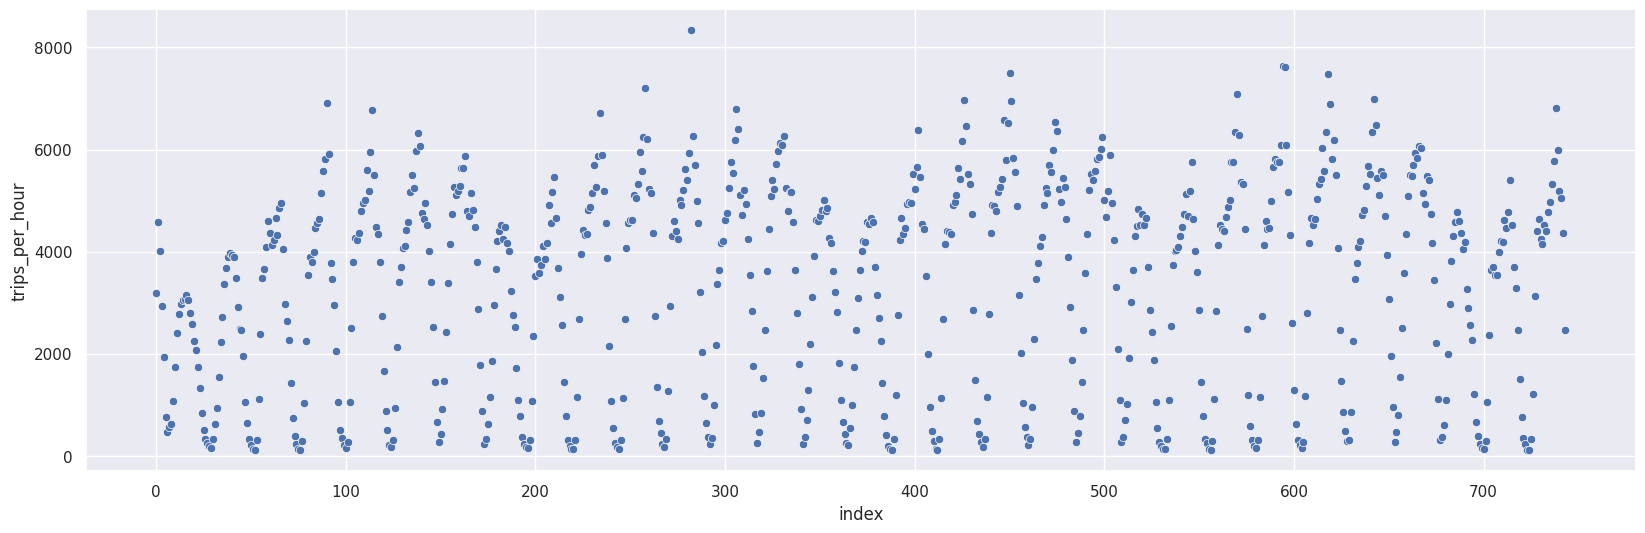

In [ ]:
from datetime import datetime, timedelta
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,6)})

# Convert columns to datetime
df_y_MH["pickup_datetime"] = pd.to_datetime(df_y_MH["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
df_y_MH["dropoff_datetime"] = pd.to_datetime(df_y_MH["dropoff_datetime"], format="%Y-%m-%d %H:%M:%S")

start_date = datetime.strptime("2023-01-01 00:00:05", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2023-01-31 23:59:59", "%Y-%m-%d %H:%M:%S")
interval = timedelta(minutes=60)
bucket_elements = []
while start_date <= end_date:
    # Check how many trips fall into this interval
    bucket_elements.append(df_y_MH[((start_date + interval) >= df_y_MH["dropoff_datetime"])
                                  & (start_date <= df_y_MH["dropoff_datetime"])].shape[0])
    # Increment
    start_date += interval

sns.scatterplot(x="index", y="trips_per_hour", data=pd.DataFrame(bucket_elements, columns=["trips_per_hour"]).reset_index())

<Axes: xlabel='index', ylabel='trips_per_hour'>

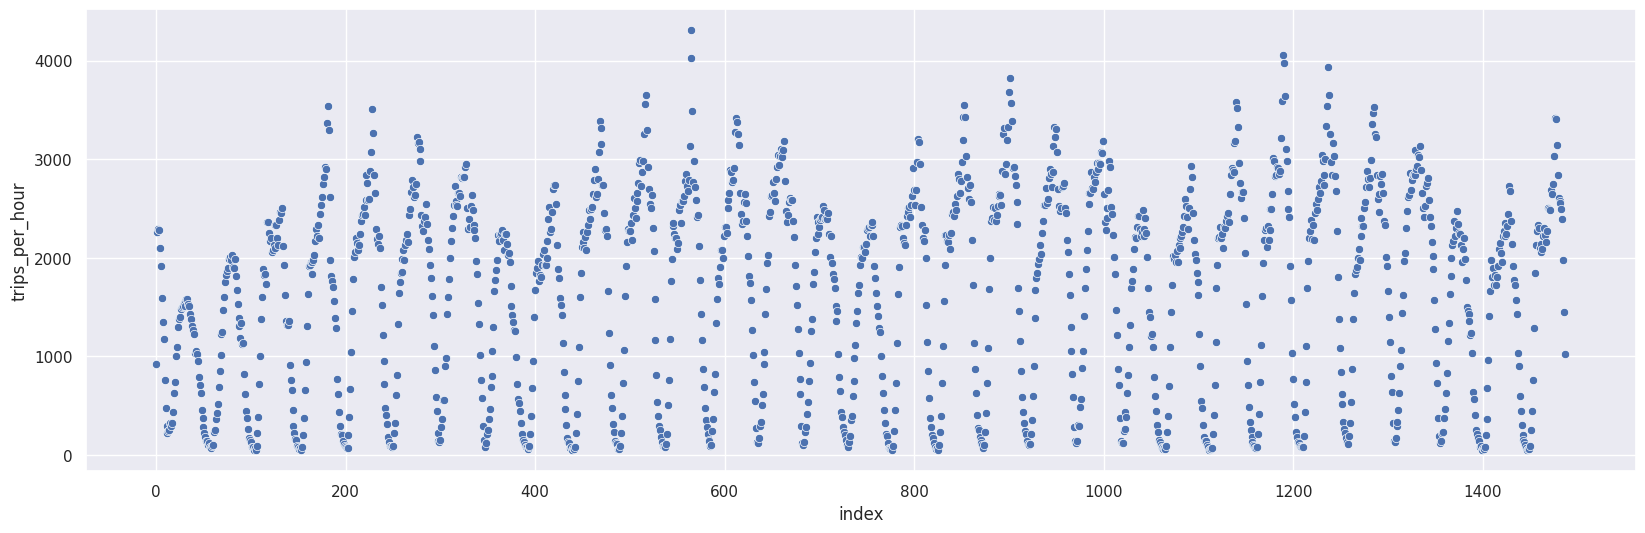

In [ ]:
# here I did 30 min intervals and I think it makes more sense

from datetime import datetime, timedelta
# import seaborn as sns
sns.set(rc={'figure.figsize':(20,6)})

# Convert columns to datetime
df_y_MH["pickup_datetime"] = pd.to_datetime(df_y_MH["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
df_y_MH["dropoff_datetime"] = pd.to_datetime(df_y_MH["dropoff_datetime"], format="%Y-%m-%d %H:%M:%S")

start_date = datetime.strptime("2023-01-01 00:00:05", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2023-01-31 23:59:59", "%Y-%m-%d %H:%M:%S")
interval = timedelta(minutes=30) #60
bucket_elements = []
while start_date <= end_date:
    # Check how many trips fall into this interval
    bucket_elements.append(df_y_MH[((start_date + interval) >= df_y_MH["dropoff_datetime"])
                                  & (start_date <= df_y_MH["dropoff_datetime"])].shape[0])
    # Increment
    start_date += interval

sns.scatterplot(x="index", y="trips_per_30_min", data=pd.DataFrame(bucket_elements, columns=["trips_per_hour"]).reset_index())

In [ ]:
# we need to figure out the best time interval step
# Another important point is how our graph changes over time. It can happen, that not all nodes are present
# in the next time-step, which makes it a bit difficult as our edge indices are shifted.
# Below I have some hints on how to cope with each of the graph types

# "Static Graph Temporal Signal"

# This is simply a graph that always stays the same and only the label information changes.
# Common examples are road networks (the nodes/edges do not suddently disappear in a long-range time horizon)
# or electricity networks. For this we can either use pytorch geometric temporal or also only pytorch geometric,
# which recently added temporal graph support (but only dynamic edges).
# This is by far the easiest graph type, because the node feature matrix and edge_index stay untouched.
# We only have to adjust the labels in each graph snapshot.

# "Dynamic Graph Temporal/Static Signal"

# The more difficult graph type is a dynamic graph (with regards to nodes/edges). This typically happens in social networks,
# that quickly grow/shrink over time, but also transaction systems like crypto networks. Previously I mentioned
# that the node ordering is implicitly defined by the node feature matrix - but what if this matrix changes.

# Option 1 üò∏

# The easiest solution is just to append new nodes (in it's temporal order at preprocessing-time) to this matrix and always use
# the full matrix (all nodes) even if not all of them are part of the current snapshot. This matrix can (depending on your nodes) get very big.
# Therefore I suggest to check what your maximum number of nodes is and if it's feasible to store your total node_feature matrix in memory.
# If your node_features change over time, that's also no problem - you can simply update the node feature matrix for each snapshot.
# The important point for this option is that the ordering of the nodes always stays the same! This means index 0 is always the same node
# (e.g. location), even if it's not really used in this snapshot.

# Option 2 üòµ

# Option 1 will lead to a very big matrix with a lot of redundancies - but has one advantage: You always have the same index for a specific node.
# It can happen that a single node only occurs once and then is carried through all other snapshots, even if it's never used again.
# If you want to make your graph really dynamic, you should also be able to remove nodes. This however will affect the edge_index,
# because the indices of the node_feature matrix change! Therefore we would need to re-index the edge_index to point to the correct nodes.
# But besides this there is another issue.

# In spatio-temporal GNN models, you typically update the node feature embeddings over time (with a recurrent unit).
# The problem really is that you need to update nodes between two snapshots, based on their indices -> But what if a node is not present anymore.
# So as you can see it's not that trivial to learn on a dynamic graph. Therefore I'd suggest to make the first Option work. :)

# In our case we have a Static Graph Temporal Signal, because our locations/edges do not really change over time.
# But as we will see later, when incorporating the labels as edge_features (for historical snapshots), we will end up with a
# Dynamic Graph Temporal Signal.

# Coming back to the node features...

# We don't really have information about the nodes (locations) here but we need them in order to apply message passing.
# If really nothing comes to your mind, I would probably assign random values (gaussian samples) to the node feature matrix.

# Here we can model the 'passenger count' as an attribute for the nodes. This allows us to say
# "this is a heavily frequented location" or not. We can calculate this information based on the dataset, but here it's always
# important to consider that we should apply a train/test split in advance (which I didn't do here) to leak no information into the train set.



In [ ]:
df_y_MH.head(2)

pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
3485 2023-01-01 00:00:05 2023-01-01 00:26:27              1.0           1.32   
2499 2023-01-01 00:00:06 2023-01-01 00:05:44              1.0           1.70   

      RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
3485         1.0            21            34             2          26.9   
2499         1.0            33            14             2          14.3   

      congestion_surcharge  
3485                   2.5  
2499                   2.5

In [ ]:
# I am using 'passenger_count' as a proxy for busy-ness/demand of a route (this is not a good idea on a second thought)
# maybe we should use df_y_MH['PULocationID'].value_counts() [I have this in the following cells, scroll down]
df_y_MH['passenger_count'].value_counts()

1.0    1882221
2.0     364055
3.0      87572
0.0      44180
4.0      43201
5.0      36252
6.0      24196
8.0          5
7.0          1
Name: passenger_count, dtype: int64

In [ ]:
outgoing_trips = df_y_MH.groupby("PULocationID").count()["passenger_count"].values

In [ ]:
incoming_trips = df_y_MH.groupby("DOLocationID").count()['passenger_count'].values

In [ ]:
outgoing_trips

In [ ]:
incoming_trips

In [ ]:
# Normalize features between 0 and 1 (think about using std for normalization?)
outgoing_trips_norm = (outgoing_trips - np.min(outgoing_trips)) / (np.max(outgoing_trips) - np.min(outgoing_trips))
incoming_trips_norm = (incoming_trips - np.min(incoming_trips)) / (np.max(incoming_trips) - np.min(incoming_trips))

In [ ]:
outgoing_trips_norm

array([8.81559976e-01, 3.35688971e-01, 5.38484485e-01, 4.44547824e-01,
       5.78371698e-01, 4.30335874e-01, 5.34116494e-01, 5.34478718e-01,
       4.88085684e-01, 3.18650255e-01, 1.00000000e+00, 2.26851424e-01,
       2.34607271e-01, 5.55260410e-01, 4.89825778e-01, 4.33773447e-01,
       5.73968195e-01, 2.38257917e-01, 9.32612201e-01, 1.48234693e-01,
       4.08204720e-01, 4.35556155e-01, 6.86903840e-01, 2.58315163e-02,
       6.68607996e-01, 1.70003622e-01, 1.30677500e-01, 1.79400129e-01,
       4.18496133e-01, 2.44714021e-01, 9.74381556e-02, 2.80311370e-01,
       1.22353459e-01, 8.83541553e-02, 7.26499854e-01, 1.53597023e-01,
       3.04012159e-01, 1.17374660e-01, 1.96239977e-02, 8.06835373e-02,
       2.53130393e-01, 5.50792986e-02, 8.78143710e-02, 4.38574686e-02,
       2.59550985e-01, 4.34845913e-01, 3.76286427e-02, 3.97664723e-02,
       1.66622868e-02, 7.82829180e-02, 2.19749000e-02, 1.32460209e-02,
       2.52846296e-02, 1.67617208e-03, 3.17080620e-01, 1.02416955e-02,
      

In [ ]:
incoming_trips_norm

array([7.66833829e-01, 2.51069188e-01, 4.93085557e-01, 4.10408933e-01,
       5.86168219e-01, 3.74848939e-01, 5.89764742e-01, 4.81890744e-01,
       4.23354970e-01, 2.72655566e-01, 9.09254716e-01, 3.22001028e-01,
       2.78618414e-01, 4.74350346e-01, 4.77433081e-01, 4.60941175e-01,
       5.85263661e-01, 3.09076699e-01, 1.00000000e+00, 1.67864302e-01,
       4.56816389e-01, 3.39013959e-01, 5.40448227e-01, 8.19529774e-02,
       5.91016651e-01, 1.92960366e-01, 1.52479575e-01, 1.83075353e-01,
       4.92940827e-01, 2.86375905e-01, 1.37847441e-01, 3.37342335e-01,
       2.53146054e-01, 8.59113243e-02, 4.54298099e-01, 1.94820138e-01,
       3.74552244e-01, 2.15349992e-01, 7.82334339e-02, 1.27043397e-01,
       1.90984811e-01, 7.18146886e-02, 1.33346359e-01, 1.19705621e-01,
       2.52321096e-01, 4.46077474e-01, 1.37391543e-01, 5.65240359e-02,
       8.57521221e-02, 7.46513833e-02, 4.99388519e-02, 4.27458047e-02,
       4.69284820e-02, 3.02556643e-02, 2.60498303e-01, 5.38031247e-02,
      

In [ ]:
# Build node features
node_features_norm = np.stack([outgoing_trips_norm, incoming_trips_norm]).transpose()


In [ ]:
node_features

array([[8.81559976e-01, 7.66833829e-01],
       [3.35688971e-01, 2.51069188e-01],
       [5.38484485e-01, 4.93085557e-01],
       [4.44547824e-01, 4.10408933e-01],
       [5.78371698e-01, 5.86168219e-01],
       [4.30335874e-01, 3.74848939e-01],
       [5.34116494e-01, 5.89764742e-01],
       [5.34478718e-01, 4.81890744e-01],
       [4.88085684e-01, 4.23354970e-01],
       [3.18650255e-01, 2.72655566e-01],
       [1.00000000e+00, 9.09254716e-01],
       [2.26851424e-01, 3.22001028e-01],
       [2.34607271e-01, 2.78618414e-01],
       [5.55260410e-01, 4.74350346e-01],
       [4.89825778e-01, 4.77433081e-01],
       [4.33773447e-01, 4.60941175e-01],
       [5.73968195e-01, 5.85263661e-01],
       [2.38257917e-01, 3.09076699e-01],
       [9.32612201e-01, 1.00000000e+00],
       [1.48234693e-01, 1.67864302e-01],
       [4.08204720e-01, 4.56816389e-01],
       [4.35556155e-01, 3.39013959e-01],
       [6.86903840e-01, 5.40448227e-01],
       [2.58315163e-02, 8.19529774e-02],
       [6.686079

In [ ]:
print("Full shape: ", node_features_norm.shape)


Full shape:  (63, 2)


In [ ]:
node_features_norm[:10] # [num_nodes x num_features]

array([[0.88155998, 0.76683383],
       [0.33568897, 0.25106919],
       [0.53848448, 0.49308556],
       [0.44454782, 0.41040893],
       [0.5783717 , 0.58616822],
       [0.43033587, 0.37484894],
       [0.53411649, 0.58976474],
       [0.53447872, 0.48189074],
       [0.48808568, 0.42335497],
       [0.31865026, 0.27265557]])

In [ ]:
df_y_MH.head(2)

pickup_datetime     dropoff_datetime  passenger_count  \
3485  2023-01-01 00:00:05  2023-01-01 00:26:27              1.0   
2499  2023-01-01 00:00:06  2023-01-01 00:05:44              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3485           1.32         1.0            21            34             2   
2499           1.70         1.0            33            14             2   

      total_amount  congestion_surcharge  
3485          26.9                   2.5  
2499          14.3                   2.5

In [ ]:
# Extract the edges

# As mentioned previously, we want to create the edges based on the 'trip_distance', and latitudes, longitudes of the PULocation and
# DOLocations as this is all information we have in this dataset.
# The hope is, that the GNN can later identify "crowded" places, where the tripduration will most likely take longer (due to traffic).

# The topology of our graph is therefore static in this dataset, because the edges don't change and also the nodes are always the same.
# Therefore we can pre-compute this part of the graph. In fact, the only temporal part here are the labels (tripdurations), as we will see further below.

# Therefore, we only calculate the edges once here for all snapshots. This can be efficiently done by building all combinations (the cartesian product)
# and applying the distance calculation on each row. Remember: when dealing with dataframes there is almost always a better way than using a for-loop üòÄ

# But there was one problem I encountered during modelling the labels. I planned to use past labels (aka historical trip durations) as edge features,
# as this will add a lot of information to the graph. This basically tells us "this is the current trip duration for some parts of the graph
# (edge features), please predict 1 hour into the future for other parts of the graph" (labels). Edge features however can only
# "live" on existing edges and unfortunately the static edges here (based on the location) are different from the taxi-trips
#(which are not distance-based). Because of that I will extend the edge index later by the edges for the taxi trips and will use
# edge features to signal that these added edges have different properties than the once I add here. Consequentely, we will use a
# Dynamic Graph Temporal Signal later. Note that this situation comes from the fact that we have two edges types - one for the distance-based edges
# and one for the trips. We could also model this as a heterogeneous graph instead of providing the information as edge features.

# Edge feats: [distance, edge_type, historical trip duration]




In [ ]:
gpd.read_file("/content/mnt/MyDrive/taxi_colab/assets/tableau/taxi_zones/taxi_zones.dbf")

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         254   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough    NormID  \
0              EWR  0.003802   
1           Queens  0.007605   
2            Bronx  0.011407   
3        Manhattan  0.015209   
4    Staten Island  0.019011   
..             ...       ...   
258          Bronx  0.984791   
259         Queens  0.965779   
260      Manhattan  0.992395   
261      Manhattan  0.996198   
262      Manhattan  1.000000   

                                              geometry  
0    POLYGON ((933100.918 192536.086, 933091.011 19...  
1    MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2    POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3    POLYGON ((992073.467 203714.076, 992068.667 20...  
4    POLYGON ((935843.310 144283.336, 936046.565 14...  
..                                                 ...  
258  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260  POLYGON ((980555.204 196138.486, 980570.792 19...  
261  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262  POLYGON ((997493.323 220912.386, 997355.264 22...  

[263 rows x 8 columns]

In [ ]:
gdf = gpd.read_file("/content/mnt/MyDrive/taxi_colab/assets/tableau/taxi_zones/taxi_zones.shp")

In [ ]:
gdf = gdf.to_crs(4326)
gdf['lon'] = gdf.centroid.x
gdf['lat'] = gdf.centroid.y
# there is a discussion here
# https://gis.stackexchange.com/questions/372564/userwarning-when-trying-to-get-centroid-from-a-polygon-geopandas
# regarding the warning I get for centroid

<ipython-input-39-1f9f32507414>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.centroid.x
<ipython-input-39-1f9f32507414>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.centroid.y


In [ ]:
gdf

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         254   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough    NormID  \
0              EWR  0.003802   
1           Queens  0.007605   
2            Bronx  0.011407   
3        Manhattan  0.015209   
4    Staten Island  0.019011   
..             ...       ...   
258          Bronx  0.984791   
259         Queens  0.965779   
260      Manhattan  0.992395   
261      Manhattan  0.996198   
262      Manhattan  1.000000   

                                              geometry        lon        lat  
0    POLYGON ((-74.18445 40.69500, -74.18449 40.695... -74.174000  40.691831  
1    MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ... -73.831299  40.616745  
2    POLYGON ((-73.84793 40.87134, -73.84725 40.870... -73.847422  40.864474  
3    POLYGON ((-73.97177 40.72582, -73.97179 40.725... -73.976968  40.723752  
4    POLYGON ((-74.17422 40.56257, -74.17349 40.562... -74.188484  40.552659  
..                                                 ...        ...        ...  
258  POLYGON ((-73.85107 40.91037, -73.85207 40.909... -73.852215  40.897932  
259  POLYGON ((-73.90175 40.76078, -73.90147 40.759... -73.906306  40.744235  
260  POLYGON ((-74.01333 40.70503, -74.01327 40.704... -74.013023  40.709139  
261  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ... -73.946510  40.775932  
262  POLYGON ((-73.95219 40.77302, -73.95269 40.772... -73.951010  40.778766  

[263 rows x 10 columns]

In [ ]:

# locations = gpd.read_file("/content/mnt/MyDrive/taxi_colab/assets/tableau/taxi_zones/taxi_zones.shx")
# locations.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough    NormID                                           geometry  
0            EWR  0.003802  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  0.007605  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  0.011407  POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3      Manhattan  0.015209  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  0.019011  POLYGON ((935843.310 144283.336, 936046.565 14...

In [ ]:
gdf_MH = gdf[gdf['borough'] == "Manhattan"]

In [ ]:
gdf_MH

OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
3           4    0.043567    0.000112              Alphabet City           4   
11         12    0.036661    0.000042               Battery Park          12   
12         13    0.050281    0.000149          Battery Park City          13   
23         24    0.047000    0.000061               Bloomingdale          24   
40         41    0.052793    0.000143             Central Harlem          41   
..        ...         ...         ...                        ...         ...   
245       246    0.069467    0.000281  West Chelsea/Hudson Yards         246   
248       249    0.036384    0.000072               West Village         249   
260       261    0.027120    0.000034         World Trade Center         261   
261       262    0.049064    0.000122             Yorkville East         262   
262       263    0.037017    0.000066             Yorkville West         263   

       borough    NormID                                           geometry  \
3    Manhattan  0.015209  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
11   Manhattan  0.045627  POLYGON ((-74.01566 40.70483, -74.01540 40.704...   
12   Manhattan  0.049430  POLYGON ((-74.01244 40.71906, -74.01282 40.717...   
23   Manhattan  0.091255  POLYGON ((-73.95954 40.79872, -73.96004 40.798...   
40   Manhattan  0.155894  POLYGON ((-73.94774 40.80960, -73.94506 40.808...   
..         ...       ...                                                ...   
245  Manhattan  0.935361  POLYGON ((-74.00440 40.76267, -74.00220 40.761...   
248  Manhattan  0.946768  POLYGON ((-74.00251 40.72902, -74.00282 40.728...   
260  Manhattan  0.992395  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261  Manhattan  0.996198  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262  Manhattan  1.000000  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

           lon        lat  
3   -73.976968  40.723752  
11  -74.015564  40.702946  
12  -74.016079  40.712038  
23  -73.965480  40.801970  
40  -73.951292  40.804334  
..         ...        ...  
245 -74.004015  40.753309  
248 -74.002875  40.734576  
260 -74.013023  40.709139  
261 -73.946510  40.775932  
262 -73.951010  40.778766  

[69 rows x 10 columns]

In [ ]:
# drop the followings:
gdf_MH[gdf_MH['LocationID'] == 103]

OBJECTID  Shape_Leng  Shape_Area  \
102       103    0.014306    0.000006   
103       104    0.021221    0.000012   
104       105    0.077425    0.000369   

                                              zone  LocationID    borough  \
102  Governor's Island/Ellis Island/Liberty Island         103  Manhattan   
103  Governor's Island/Ellis Island/Liberty Island         103  Manhattan   
104  Governor's Island/Ellis Island/Liberty Island         103  Manhattan   

       NormID                                           geometry        lon  \
102  0.391635  POLYGON ((-74.04389 40.69018, -74.04351 40.689... -74.045288   
103  0.391635  POLYGON ((-74.03995 40.70089, -74.03945 40.700... -74.040771   
104  0.391635  POLYGON ((-74.01675 40.69334, -74.01540 40.693... -74.019073   

           lat  
102  40.689860  
103  40.698769  
104  40.688784

In [ ]:
gdf_MH[gdf_MH['zone'] == "Governor's Island/Ellis Island/Liberty Island"]

OBJECTID  Shape_Leng  Shape_Area  \
102       103    0.014306    0.000006   
103       104    0.021221    0.000012   
104       105    0.077425    0.000369   

                                              zone  LocationID    borough  \
102  Governor's Island/Ellis Island/Liberty Island         103  Manhattan   
103  Governor's Island/Ellis Island/Liberty Island         103  Manhattan   
104  Governor's Island/Ellis Island/Liberty Island         103  Manhattan   

       NormID                                           geometry        lon  \
102  0.391635  POLYGON ((-74.04389 40.69018, -74.04351 40.689... -74.045288   
103  0.391635  POLYGON ((-74.03995 40.70089, -74.03945 40.700... -74.040771   
104  0.391635  POLYGON ((-74.01675 40.69334, -74.01540 40.693... -74.019073   

           lat  
102  40.689860  
103  40.698769  
104  40.688784

In [ ]:
gdf_MH[gdf_MH['LocationID'] == 153]

OBJECTID  Shape_Leng  Shape_Area         zone  LocationID    borough  \
152       153    0.024737    0.000032  Marble Hill         153  Manhattan   

       NormID                                           geometry        lon  \
152  0.581749  POLYGON ((-73.90667 40.87572, -73.90693 40.875... -73.910379   

           lat  
152  40.875968

In [ ]:
gdf_MH[gdf_MH['zone'] == "Marble Hill"]

OBJECTID  Shape_Leng  Shape_Area         zone  LocationID    borough  \
152       153    0.024737    0.000032  Marble Hill         153  Manhattan   

       NormID                                           geometry        lon  \
152  0.581749  POLYGON ((-73.90667 40.87572, -73.90693 40.875... -73.910379   

           lat  
152  40.875968

In [ ]:
gdf_MH[gdf_MH['LocationID'] == 194]

OBJECTID  Shape_Leng  Shape_Area             zone  LocationID    borough  \
193       194    0.081794    0.000273  Randalls Island         194  Manhattan   

       NormID                                           geometry        lon  \
193  0.737643  POLYGON ((-73.91640 40.79768, -73.91545 40.797... -73.924596   

           lat  
193  40.791001

In [ ]:
gdf_MH[gdf_MH['zone'] == "Randalls Island"]

OBJECTID  Shape_Leng  Shape_Area             zone  LocationID    borough  \
193       194    0.081794    0.000273  Randalls Island         194  Manhattan   

       NormID                                           geometry        lon  \
193  0.737643  POLYGON ((-73.91640 40.79768, -73.91545 40.797... -73.924596   

           lat  
193  40.791001

In [ ]:
gdf_MH[gdf_MH['LocationID'] == 202]

OBJECTID  Shape_Leng  Shape_Area              zone  LocationID  \
201       202    0.069922    0.000106  Roosevelt Island         202   

       borough    NormID                                           geometry  \
201  Manhattan  0.768061  POLYGON ((-73.94180 40.76905, -73.94257 40.768...   

           lon      lat  
201 -73.949952  40.7619

In [ ]:
gdf_MH[gdf_MH['zone'] == "Roosevelt Island"]

OBJECTID  Shape_Leng  Shape_Area              zone  LocationID  \
201       202    0.069922    0.000106  Roosevelt Island         202   

       borough    NormID                                           geometry  \
201  Manhattan  0.768061  POLYGON ((-73.94180 40.76905, -73.94257 40.768...   

           lon      lat  
201 -73.949952  40.7619

In [ ]:
# if we drop the above 6 zones, we get to have the 63 zones we kept in the df_y_MH

In [ ]:
gdf_MH = gdf_MH[gdf_MH['LocationID'] != 103] # ,153,194,202]]


In [ ]:
gdf_MH = gdf_MH[gdf_MH['LocationID'] != 153]

In [ ]:
gdf_MH = gdf_MH[gdf_MH['LocationID'] != 202]

In [ ]:
gdf_MH = gdf_MH[gdf_MH['LocationID'] != 194]

In [ ]:
# this GEO data set matches with the taxi zones we have in df_y_MH
gdf_MH

OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
3           4    0.043567    0.000112              Alphabet City           4   
11         12    0.036661    0.000042               Battery Park          12   
12         13    0.050281    0.000149          Battery Park City          13   
23         24    0.047000    0.000061               Bloomingdale          24   
40         41    0.052793    0.000143             Central Harlem          41   
..        ...         ...         ...                        ...         ...   
245       246    0.069467    0.000281  West Chelsea/Hudson Yards         246   
248       249    0.036384    0.000072               West Village         249   
260       261    0.027120    0.000034         World Trade Center         261   
261       262    0.049064    0.000122             Yorkville East         262   
262       263    0.037017    0.000066             Yorkville West         263   

       borough    NormID                                           geometry  \
3    Manhattan  0.015209  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
11   Manhattan  0.045627  POLYGON ((-74.01566 40.70483, -74.01540 40.704...   
12   Manhattan  0.049430  POLYGON ((-74.01244 40.71906, -74.01282 40.717...   
23   Manhattan  0.091255  POLYGON ((-73.95954 40.79872, -73.96004 40.798...   
40   Manhattan  0.155894  POLYGON ((-73.94774 40.80960, -73.94506 40.808...   
..         ...       ...                                                ...   
245  Manhattan  0.935361  POLYGON ((-74.00440 40.76267, -74.00220 40.761...   
248  Manhattan  0.946768  POLYGON ((-74.00251 40.72902, -74.00282 40.728...   
260  Manhattan  0.992395  POLYGON ((-74.01333 40.70503, -74.01327 40.704...   
261  Manhattan  0.996198  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...   
262  Manhattan  1.000000  POLYGON ((-73.95219 40.77302, -73.95269 40.772...   

           lon        lat  
3   -73.976968  40.723752  
11  -74.015564  40.702946  
12  -74.016079  40.712038  
23  -73.965480  40.801970  
40  -73.951292  40.804334  
..         ...        ...  
245 -74.004015  40.753309  
248 -74.002875  40.734576  
260 -74.013023  40.709139  
261 -73.946510  40.775932  
262 -73.951010  40.778766  

[63 rows x 10 columns]

In [ ]:
df_y_MH['PULocationID'].value_counts()

10    140805
18    131317
0     124129
34    102297
22     96722
       ...  
57       713
53       244
60       107
61        10
62         8
Name: PULocationID, Length: 63, dtype: int64

In [ ]:
# new_ids = list(range(len(df_y_MH['PULocationID'].unique())))
# zip(locations, new_ids)
# dict(zip(locations, new_ids))
# mapping = dict(zip(locations, new_ids))
gdf_MH['LocationID'] = gdf_MH['LocationID'].map(mapping)
gdf_MH.head()

# now, the LocationID numbers match with the df_y_MH PULocation and DOLocation

OBJECTID  Shape_Leng  Shape_Area               zone  LocationID  \
3          4    0.043567    0.000112      Alphabet City          38   
11        12    0.036661    0.000042       Battery Park          57   
12        13    0.050281    0.000149  Battery Park City          30   
23        24    0.047000    0.000061       Bloomingdale          41   
40        41    0.052793    0.000143     Central Harlem          43   

      borough    NormID                                           geometry  \
3   Manhattan  0.015209  POLYGON ((-73.97177 40.72582, -73.97179 40.725...   
11  Manhattan  0.045627  POLYGON ((-74.01566 40.70483, -74.01540 40.704...   
12  Manhattan  0.049430  POLYGON ((-74.01244 40.71906, -74.01282 40.717...   
23  Manhattan  0.091255  POLYGON ((-73.95954 40.79872, -73.96004 40.798...   
40  Manhattan  0.155894  POLYGON ((-73.94774 40.80960, -73.94506 40.808...   

          lon        lat  
3  -73.976968  40.723752  
11 -74.015564  40.702946  
12 -74.016079  40.712038  
23 -73.965480  40.801970  
40 -73.951292  40.804334

In [ ]:
gdf_MH.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 63 entries, 3 to 262
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    63 non-null     int64   
 1   Shape_Leng  63 non-null     float64 
 2   Shape_Area  63 non-null     float64 
 3   zone        63 non-null     object  
 4   LocationID  63 non-null     int64   
 5   borough     63 non-null     object  
 6   NormID      63 non-null     float64 
 7   geometry    63 non-null     geometry
 8   lon         63 non-null     float64 
 9   lat         63 non-null     float64 
dtypes: float64(5), geometry(1), int64(2), object(2)
memory usage: 5.4+ KB


In [ ]:
df_y_MH.head()

pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
3485 2023-01-01 00:00:05 2023-01-01 00:26:27              1.0           1.32   
2499 2023-01-01 00:00:06 2023-01-01 00:05:44              1.0           1.70   
3487 2023-01-01 00:00:08 2023-01-01 00:11:24              1.0           3.10   
4459 2023-01-01 00:00:09 2023-01-01 00:15:10              1.0           3.80   
2305 2023-01-01 00:00:18 2023-01-01 00:09:34              1.0           2.10   

      RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
3485         1.0            21            34             2         26.90   
2499         1.0            33            14             2         14.30   
3487         1.0            56            55             2         18.80   
4459         1.0             8            29             1         32.24   
2305         1.0            28            31             1         21.30   

      congestion_surcharge  
3485                   2.5  
2499                   2.5  
3487                   0.0  
4459                   2.5  
2305                   2.5

In [ ]:
df_y_MH.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
gdf_MH.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'NormID', 'geometry', 'lon', 'lat'],
      dtype='object')

In [ ]:
gdf_MH.head(2)

OBJECTID  Shape_Leng  Shape_Area           zone  LocationID    borough  \
3          4    0.043567    0.000112  Alphabet City          38  Manhattan   
11        12    0.036661    0.000042   Battery Park          57  Manhattan   

      NormID                                           geometry        lon  \
3   0.015209  POLYGON ((-73.97177 40.72582, -73.97179 40.725... -73.976968   
11  0.045627  POLYGON ((-74.01566 40.70483, -74.01540 40.704... -74.015564   

          lat  
3   40.723752  
11  40.702946

In [ ]:
gdf_MH.drop(columns=['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'borough','NormID', 'geometry' ],axis =1, inplace = True)

In [ ]:
gdf_MH.head(2)

LocationID        lon        lat
3           38 -73.976968  40.723752
11          57 -74.015564  40.702946

In [ ]:
longitude_dict = gdf_MH.set_index('LocationID')['lon'].to_dict()

In [ ]:
latitude_dict = gdf_MH.set_index('LocationID')['lat'].to_dict()

In [ ]:
df_y_MH['PULocationID_lon'] =  df_y_MH['PULocationID'].map(longitude_dict)

In [ ]:
df_y_MH['PULocationID_lat'] =  df_y_MH['PULocationID'].map(latitude_dict)

In [ ]:
df_y_MH['DOLocationID_lon'] =  df_y_MH['DOLocationID'].map(longitude_dict)

In [ ]:
df_y_MH['DOLocationID_lat'] =  df_y_MH['DOLocationID'].map(latitude_dict)

In [ ]:
df_y_MH.head(2)

pickup_datetime     dropoff_datetime  passenger_count  \
3485  2023-01-01 00:00:05  2023-01-01 00:26:27              1.0   
2499  2023-01-01 00:00:06  2023-01-01 00:05:44              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3485           1.32         1.0            21            34             2   
2499           1.70         1.0            33            14             2   

      total_amount  congestion_surcharge  PULocationID_lon  PULocationID_lat  \
3485          26.9                   2.5        -74.002875         40.734576   
2499          14.3                   2.5        -74.007486         40.726290   

      DOLocationID_lon  DOLocationID_lat  
3485        -73.992438         40.748497  
2499        -73.999917         40.748428

In [ ]:
df_y_MH.drop(columns=['congestion_surcharge'], axis = 1 , inplace = True)
#df[['Name', 'Qualification']]

In [ ]:
df_y_MH.head(2)

pickup_datetime     dropoff_datetime  passenger_count  \
3485  2023-01-01 00:00:05  2023-01-01 00:26:27              1.0   
2499  2023-01-01 00:00:06  2023-01-01 00:05:44              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3485           1.32         1.0            21            34             2   
2499           1.70         1.0            33            14             2   

      total_amount  PULocationID_lon  PULocationID_lat  DOLocationID_lon  \
3485          26.9        -74.002875         40.734576        -73.992438   
2499          14.3        -74.007486         40.726290        -73.999917   

      DOLocationID_lat  
3485         40.748497  
2499         40.748428

In [ ]:
# As mentioned previously, we want to create the edges based on the distances of the locations,
# as this is all information we have in this dataset. The hope is, that the GNN can later identify "crowded" places,
# where the tripduration will most likely take longer (due to traffic).

# The topology of our graph is therefore static in this dataset, because the edges don't change and also the nodes are always the same.
# Therefore we can pre-compute this part of the graph. In fact, the only temporal part here are the labels (tripdurations), as we will
# see further below.

# Therefore, we only calculate the edges once here for all snapshots. This can be efficiently done by building all combinations
 # (the cartesian product) and applying the distance calculation on each row. Remember: when dealing with dataframes there is
 # almost always a better way than using a for-loop üòÄ

# But there was one problem I encountered during modelling the labels.
# I planned to use past labels (aka historical trip durations) as edge features, as this will add a lot of information to the graph.
# This basically tells us "this is the current trip duration for some parts of the graph (edge features),
# please predict 1 hour into the future for other parts of the graph" (labels). Edge features however can only "live" on existing
# edges and unfortunately the static edges here (based on the location) are different from the bike-trips (which are not distance-based).
# Because of that I will extend the edge index later by the edges for the bike trips and will use edge features to signal that these added edges
# have different properties than the once I add here. Consequentely, we will use a Dynamic Graph Temporal Signal later.
# Note that this situation comes from the fact that we have two edges types - one for the distance-based edges and one for the trips.
# We could also model this as a heterogeneous graph instead of providing the information as edge features.

In [ ]:
df_y_MH.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'PULocationID_lon', 'PULocationID_lat',
       'DOLocationID_lon', 'DOLocationID_lat'],
      dtype='object')

In [ ]:
from sklearn.utils.extmath import cartesian
from geopy.distance import geodesic

# Get all possible start locations and their geo info
subset = ["PULocationID_lon", "PULocationID_lat", "PULocationID"]
all_starts = df_y_MH.drop_duplicates(subset="PULocationID", keep="first")[subset]
# Get all possible end locations and their geo info
subset = ["DOLocationID_lon", "DOLocationID_lat", "DOLocationID"]
all_ends = df_y_MH.drop_duplicates(subset="DOLocationID", keep="first")[subset]
# Combine all combinations in one dataframe
distance_matrix = all_ends.merge(all_starts, how="cross")
distance_matrix["distance"] = distance_matrix.apply(lambda x: geodesic((x["PULocationID_lat"], x["PULocationID_lon"]),
                                                          (x["DOLocationID_lat"], x["DOLocationID_lon"])).meters, axis=1)
distance_matrix.head()

DOLocationID_lon  DOLocationID_lat  DOLocationID  PULocationID_lon  \
0        -73.992438         40.748497            34        -74.002875   
1        -73.992438         40.748497            34        -74.007486   
2        -73.992438         40.748497            34        -73.940772   
3        -73.992438         40.748497            34        -73.985937   
4        -73.992438         40.748497            34        -73.973049   

   PULocationID_lat  PULocationID     distance  
0         40.734576            21  1779.629041  
1         40.726290            33  2774.352758  
2         40.818258            56  8890.099379  
3         40.727620             8  2382.491835  
4         40.791705            28  5069.735170

In [ ]:
distance_matrix.shape

(3969, 7)

In [ ]:
63*63

3969

In [ ]:
# we have trip_distance as a col in miles and it (almost) matches with the distace we got up there in meters.
df_y_MH.head()

pickup_datetime     dropoff_datetime  passenger_count  \
3485  2023-01-01 00:00:05  2023-01-01 00:26:27              1.0   
2499  2023-01-01 00:00:06  2023-01-01 00:05:44              1.0   
3487  2023-01-01 00:00:08  2023-01-01 00:11:24              1.0   
4459  2023-01-01 00:00:09  2023-01-01 00:15:10              1.0   
2305  2023-01-01 00:00:18  2023-01-01 00:09:34              1.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3485           1.32         1.0            21            34             2   
2499           1.70         1.0            33            14             2   
3487           3.10         1.0            56            55             2   
4459           3.80         1.0             8            29             1   
2305           2.10         1.0            28            31             1   

      total_amount  PULocationID_lon  PULocationID_lat  DOLocationID_lon  \
3485         26.90        -74.002875         40.734576        -73.992438   
2499         14.30        -74.007486         40.726290        -73.999917   
3487         18.80        -73.940772         40.818258        -73.941399   
4459         32.24        -73.985937         40.727620        -74.007880   
2305         21.30        -73.973049         40.791705        -73.946510   

      DOLocationID_lat  
3485         40.748497  
2499         40.748428  
3487         40.841709  
4459         40.717773  
2305         40.775932

<Axes: xlabel='distance', ylabel='Count'>

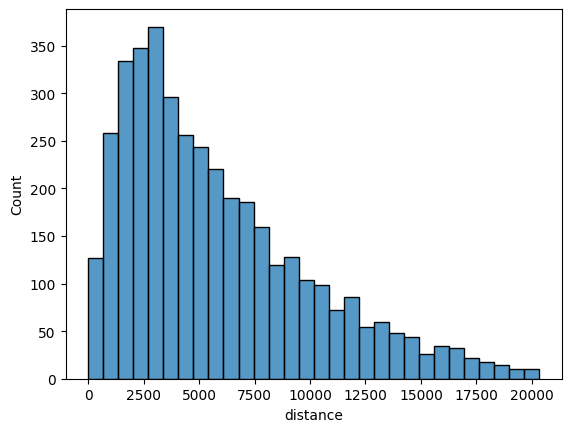

In [ ]:
# to get an idea about the distance and how to bucket it
sns.histplot(data=distance_matrix, x="distance")


In [ ]:
# Based on the new "distance" column we can now create edges. For this we can select a threshold to only connect
# nodes that are close to each other. Alternatively, you can also take all edges and assign a weight to each edge in the graph.

# The distance column is based on meters and here I'll just use 500 meteres as a cutoff (simply plot a histogram to find a good threshold).
# This will also generate self-loops (if you dont want that, simply also add > X).

In [ ]:
# for loop for each point 2,63 by 63 that would be our edge

In [ ]:
distance_matrix["edge"] = distance_matrix["distance"] < 1 #500
distance_matrix.head()

DOLocationID_lon  DOLocationID_lat  DOLocationID  PULocationID_lon  \
0        -73.992438         40.748497            34        -74.002875   
1        -73.992438         40.748497            34        -74.007486   
2        -73.992438         40.748497            34        -73.940772   
3        -73.992438         40.748497            34        -73.985937   
4        -73.992438         40.748497            34        -73.973049   

   PULocationID_lat  PULocationID     distance   edge  
0         40.734576            21  1779.629041  False  
1         40.726290            33  2774.352758  False  
2         40.818258            56  8890.099379  False  
3         40.727620             8  2382.491835  False  
4         40.791705            28  5069.735170  False

In [ ]:
# maybe we need to increase the threashold of 500 m? let's do 1 m
distance_matrix.edge.value_counts()

False    3892
True       77
Name: edge, dtype: int64

In [ ]:
# Now we are almost there! We just need a way to build the edge_index. For this, we need to consider the original
# ordering in the node feature matrix. Remember when we did the mapping of the indices before?
# - Because of that we already have the edge indices set.

In [ ]:
# Use mask to extract static edges
edge_index = distance_matrix[distance_matrix["edge"] == True][["PULocationID", "DOLocationID"]].values
edge_index = edge_index.transpose()
edge_index # [2 x num_edges]

array([[34, 14, 55, 29, 15, 31,  3, 56, 44, 40, 27, 20, 15, 31, 39, 52,
        50, 23, 36,  4, 16, 12, 41, 25, 19, 10,  5, 17, 32, 18,  2,  7,
        26,  1, 24, 41, 25, 28,  6, 45,  6, 45, 22,  0, 38, 46,  9, 21,
        22,  0,  8, 13, 37, 49, 30, 51, 35, 11, 43, 47, 57, 39, 52, 59,
        33, 49, 30, 48, 42, 60, 53, 54, 61, 58, 62, 47, 57],
       [34, 14, 55, 29, 31, 31,  3, 56, 44, 40, 27, 20, 15, 15, 52, 52,
        50, 23, 36,  4, 16, 12, 41, 41, 19, 10,  5, 17, 32, 18,  2,  7,
        26,  1, 24, 25, 25, 28, 45, 45,  6,  6,  0,  0, 38, 46,  9, 21,
        22, 22,  8, 13, 37, 30, 30, 51, 35, 11, 43, 47, 47, 39, 39, 59,
        33, 49, 49, 48, 42, 60, 53, 54, 61, 58, 62, 57, 57]])

In [ ]:
edge_index.shape

(2, 77)

In [ ]:
# edge weight, what does it do? is it NN and NNN analogue?

In [ ]:
# Add edge features to indicate edge type
distance_feature = distance_matrix[distance_matrix["edge"] == True]["distance"].values
edge_type_feature = np.zeros_like(distance_feature) # 0 = static edge
trip_duration_feature = np.zeros_like(distance_feature) # 0 = no information
static_edge_features = np.stack([distance_feature, edge_type_feature, trip_duration_feature]).transpose()
static_edge_features # [num_edges x num_features]

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [493.23886622,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [493.23886622,   0.        ,   0.        ],
       [409.94619979,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.     

In [ ]:
static_edge_features.shape

(77, 3)

In [ ]:
# Now we get in touch with the temporal aspect of our dataset. Because the edge_index and the node features were static,
# we could pre-compute them for each snapshot. The labels however change over time, because we have different trip durations for
# different taxi rides for each 60 min interval. In addition to that we can also use historical labels as edge features. This is a special
# attribute of time-series datasets - the labels become features for past timesteps. If you have a node-level prediction task you can add the
# historical labels as node features to each of the nodes. But this also means that you cannot pre-compute the node feature matrix and need to do
# it in the following loop instead.

# In most of the time-series libraries this is called a "lag" or "offset". In our dataset we want to predict 1 hour into the future,
# based on the current situation (trip durations). Therefore, we can use the current trip durations as edge features and the trip durations of
# the next snapshot as targets. Of course you could also define a larger offset, for example 12 hours into the future.

# As mentioned previously, we have to types of edges now - static edges based on the location and edges for historical trips
# (for which we need to insert new edges to use the edge features). It can happen that we have multiple bikers on the same
# "edge" (=route) - here we simply average all of the trip durations between two nodes.

# Generally, everything that is temporal needs to be computed in a loop over the time-series. Because of that, we loop over the start
# and end time of our dataset and store the labels of each subsequent snapshot in a list and the current trip durations as edge features
# in another list. We also stack the pre-computed node_features and edge_index, so that the first entry in each list corresponds to the
# first snapshot and so on. That's at least how it is typically done in pytorch geometric temporal. Note that there is also a TemporalData Object
# in plain PyG available now.

In [ ]:
df_y_MH.pickup_datetime.min()

'2023-01-01 00:00:05'

In [ ]:
df_y_MH.dropoff_datetime.max()

'2023-02-01 23:18:41'

In [ ]:
df_y_MH.head(2)

pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
3485 2023-01-01 00:00:05 2023-01-01 00:26:27              1.0           1.32   
2499 2023-01-01 00:00:06 2023-01-01 00:05:44              1.0           1.70   

      RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
3485         1.0            21            34             2          26.9   
2499         1.0            33            14             2          14.3   

      PULocationID_lon  PULocationID_lat  DOLocationID_lon  DOLocationID_lat  
3485        -74.002875         40.734576        -73.992438         40.748497  
2499        -74.007486         40.726290        -73.999917         40.748428

In [ ]:
df_y_MH['ride_duration'] = df_y_MH['dropoff_datetime']- df_y_MH['pickup_datetime']

In [ ]:
df_y_MH.head(2)

pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
3485 2023-01-01 00:00:05 2023-01-01 00:26:27              1.0           1.32   
2499 2023-01-01 00:00:06 2023-01-01 00:05:44              1.0           1.70   

      RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
3485         1.0            21            34             2          26.9   
2499         1.0            33            14             2          14.3   

      PULocationID_lon  PULocationID_lat  DOLocationID_lon  DOLocationID_lat  \
3485        -74.002875         40.734576        -73.992438         40.748497   
2499        -74.007486         40.726290        -73.999917         40.748428   

       ride_duration  
3485 0 days 00:26:22  
2499 0 days 00:05:38

In [ ]:
df_y_MH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481683 entries, 3485 to 2994400
Data columns (total 14 columns):
 #   Column            Dtype          
---  ------            -----          
 0   pickup_datetime   datetime64[ns] 
 1   dropoff_datetime  datetime64[ns] 
 2   passenger_count   float64        
 3   trip_distance     float64        
 4   RatecodeID        float64        
 5   PULocationID      int64          
 6   DOLocationID      int64          
 7   payment_type      int64          
 8   total_amount      float64        
 9   PULocationID_lon  float64        
 10  PULocationID_lat  float64        
 11  DOLocationID_lon  float64        
 12  DOLocationID_lat  float64        
 13  ride_duration     timedelta64[ns]
dtypes: datetime64[ns](2), float64(8), int64(3), timedelta64[ns](1)
memory usage: 284.0 MB


In [ ]:
# converting the ride_duration to only minutes
df_y_MH['ride_duration_min'] = df_y_MH['ride_duration'].dt.total_seconds()/60


In [ ]:
df_y_MH.head()

pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
3485 2023-01-01 00:00:05 2023-01-01 00:26:27              1.0           1.32   
2499 2023-01-01 00:00:06 2023-01-01 00:05:44              1.0           1.70   
3487 2023-01-01 00:00:08 2023-01-01 00:11:24              1.0           3.10   
4459 2023-01-01 00:00:09 2023-01-01 00:15:10              1.0           3.80   
2305 2023-01-01 00:00:18 2023-01-01 00:09:34              1.0           2.10   

      RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
3485         1.0            21            34             2         26.90   
2499         1.0            33            14             2         14.30   
3487         1.0            56            55             2         18.80   
4459         1.0             8            29             1         32.24   
2305         1.0            28            31             1         21.30   

      PULocationID_lon  PULocationID_lat  DOLocationID_lon  DOLocationID_lat  \
3485        -74.002875         40.734576        -73.992438         40.748497   
2499        -74.007486         40.726290        -73.999917         40.748428   
3487        -73.940772         40.818258        -73.941399         40.841709   
4459        -73.985937         40.727620        -74.007880         40.717773   
2305        -73.973049         40.791705        -73.946510         40.775932   

       ride_duration  ride_duration_min  
3485 0 days 00:26:22          26.366667  
2499 0 days 00:05:38           5.633333  
3487 0 days 00:11:16          11.266667  
4459 0 days 00:15:01          15.016667  
2305 0 days 00:09:16           9.266667

In [ ]:
df_y_MH['ride_duration_min'].min(), df_y_MH['ride_duration_min'].max()

(0.0, 2155.5833333333335)

In [ ]:
# let's drop the outliers
df_y_MH = df_y_MH[df_y_MH['ride_duration_min'] !=2155.5833333333335]

In [ ]:
df_y_MH['ride_duration_min'].max()

1881.5166666666667

In [ ]:
df_y_MH = df_y_MH[df_y_MH['ride_duration_min'] !=1881.5166666666667]

In [ ]:
df_y_MH['ride_duration_min'].max()

1620.4333333333334

In [ ]:
df_y_MH = df_y_MH[df_y_MH['ride_duration_min'] !=1620.4333333333334]

In [ ]:
df_y_MH['ride_duration_min'].max()

1444.1666666666667

In [ ]:
df_y_MH = df_y_MH[df_y_MH['ride_duration_min'] !=1444.1666666666667]

In [ ]:
df_y_MH['ride_duration_min'].max()

1439.65

In [ ]:
df_y_MH = df_y_MH[df_y_MH['ride_duration_min'] !=1439.65]

<Axes: xlabel='ride_duration_min', ylabel='Count'>

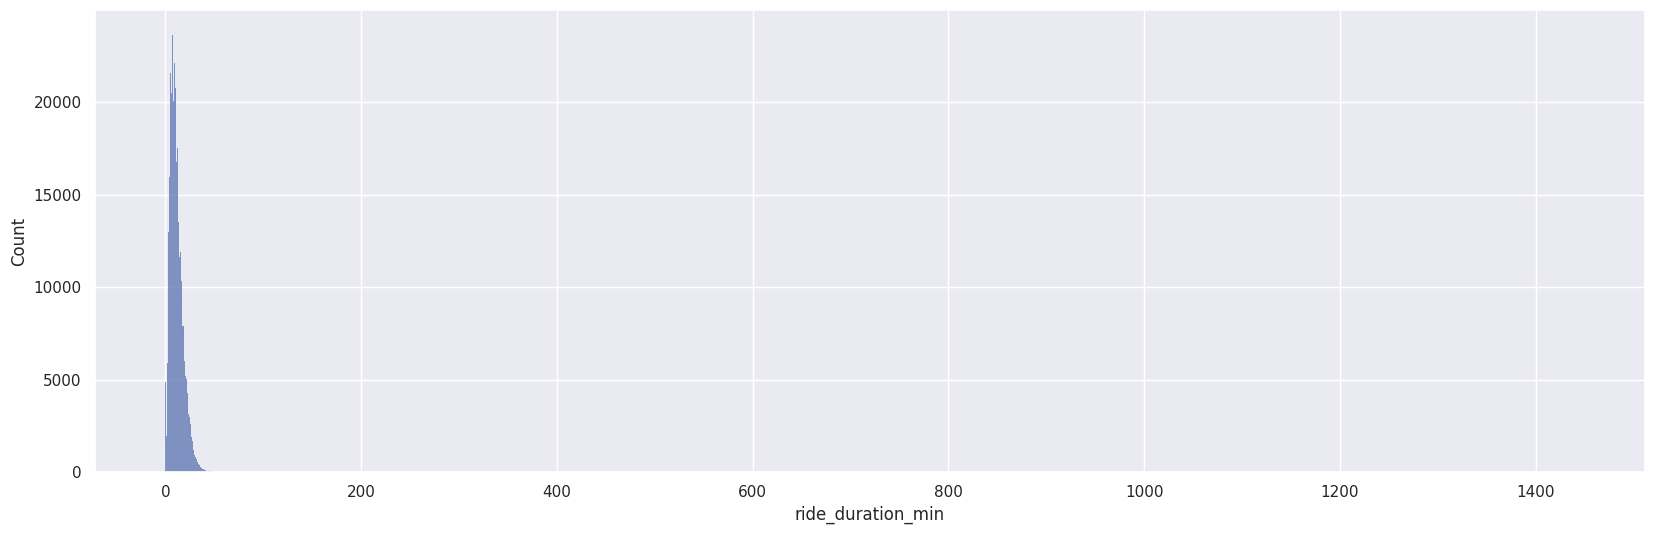

In [ ]:
# to get an idea about the distance and how to bucket it
sns.histplot(data=df_y_MH, x="ride_duration_min")


In [ ]:
df_y_MH['ride_duration_seconds'] = df_y_MH['ride_duration'].dt.total_seconds()


In [ ]:
df_y_MH.head(2)

pickup_datetime    dropoff_datetime  passenger_count  trip_distance  \
3485 2023-01-01 00:00:05 2023-01-01 00:26:27              1.0           1.32   
2499 2023-01-01 00:00:06 2023-01-01 00:05:44              1.0           1.70   

      RatecodeID  PULocationID  DOLocationID  payment_type  total_amount  \
3485         1.0            21            34             2          26.9   
2499         1.0            33            14             2          14.3   

      PULocationID_lon  PULocationID_lat  DOLocationID_lon  DOLocationID_lat  \
3485        -74.002875         40.734576        -73.992438         40.748497   
2499        -74.007486         40.726290        -73.999917         40.748428   

       ride_duration  ride_duration_min  ride_duration_seconds  
3485 0 days 00:26:22          26.366667                 1582.0  
2499 0 days 00:05:38           5.633333                  338.0

In [ ]:
26.366667*60

1582.00002

In [ ]:
def extract_dynamic_edges(s):
    # Extract dynamic edges and their features
    trip_indices = s[["PULocationID", "DOLocationID"]].values
    trip_durations = s["ride_duration_seconds"]

    # Build edge features
    distance_feature  = pd.DataFrame(trip_indices,
                                    columns=["PULocationID", "DOLocationID"]).merge(
                                        distance_matrix, on=["PULocationID", "DOLocationID"],
                                        how="left")["distance"].values
    edge_type_feature = np.ones_like(distance_feature) # 1 = dynamic
    trip_duration_feature = trip_durations
    edge_features = np.stack([distance_feature, edge_type_feature, trip_duration_feature]).transpose()
    return edge_features, trip_indices.transpose()



start_date = datetime.strptime("2023-01-01 00:00:05", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2023-01-31 23:59:59", "%Y-%m-%d %H:%M:%S")
interval = timedelta(minutes=60)

xs = []
edge_indices = []
ys = []
y_indices = []
edge_features = []


while start_date <= end_date:
    # 0 - 60 min
    current_snapshot = df_y_MH[((start_date + interval) >= df_y_MH["dropoff_datetime"])
                                  & (start_date <= df_y_MH["dropoff_datetime"])]
    # 60 - 120 min
    subsequent_snapshot = df_y_MH[((start_date + 2*interval) >= df_y_MH["dropoff_datetime"])
                                  & (start_date + interval <= df_y_MH["dropoff_datetime"])]
    # Average duplicate trips
    current_snapshot = current_snapshot.groupby(["PULocationID", "DOLocationID"]).mean().reset_index()
    subsequent_snapshot = subsequent_snapshot.groupby(["PULocationID", "DOLocationID"]).mean().reset_index()

    # Extract dynamic trip edges
    edge_feats, additional_edge_index = extract_dynamic_edges(current_snapshot)
    exteneded_edge_index = np.concatenate([edge_index, additional_edge_index], axis=1)
    extended_edge_feats = np.concatenate([edge_feats, static_edge_features], axis=0)

    # Labels
    y = subsequent_snapshot["ride_duration_seconds"].values
    y_index = subsequent_snapshot[["PULocationID", "DOLocationID"]].values

    # Append everything
    xs.append(node_features) # static
    edge_indices.append(exteneded_edge_index) # static + dynamic
    edge_features.append(extended_edge_feats) # static + dynamic
    ys.append(y) # dynamic
    y_indices.append(y_index.transpose()) # dynamic

    # Increment
    start_date += interval

In [ ]:
# Ok so what did we just do here?

# After each 60 min interval, we get a subset of our dataframe for this time range. Based on that, we extract
# all the available edge labels between two locations. Those are the ones we want to predict later in the model.
# In order to calculate the loss only based on the edges for which we have labels, we store some sort of mask (y_index)
# that tells us for which source/target pairs we have labels.

# Important: Here we take the label of each snapshot as target value.

# We could of course also normalize the labels to ensure smoother training for the regression setup.

In [ ]:
i = 2
print(f"""Example of graph snapshot {i}: \n
      Node feature shape: {xs[i].shape} \n
      Edge index shape: {edge_indices[i].shape} \n
      Edge feature shape: {edge_features[i].shape} \n
      Labels shape: {ys[i].shape} \n
      Labels mask shape: {y_indices[i].shape}
      """)

Example of graph snapshot 2: 

      Node feature shape: (63, 2) 

      Edge index shape: (2, 1724) 

      Edge feature shape: (1724, 3) 
 
      Labels shape: (1349,) 

      Labels mask shape: (2, 1349)
      


In [ ]:
# https://pytorch-geometric-temporal.readthedocs.io/en/latest/modules/signal.html
# https://pytorch-geometric-temporal.readthedocs.io/en/latest/_modules/torch_geometric_temporal/dataset/wikimath.html#WikiMathsDatasetLoader

In [ ]:
from torch_geometric_temporal.signal import DynamicGraphTemporalSignal
dataset = DynamicGraphTemporalSignal(
            edge_indices, edge_features, xs, ys, y_indices=y_indices
            )

In [ ]:
# End (for now)

In [ ]:
# list of Manhattan zones that we kept: (we kept 63 of the 256 zones)
# [ 4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
#         79,  87,  88,  90, 100, 107, 113, 114, 116, 120, 125, 127, 128,
#        137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163,
#        164, 166, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234,
#        236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

In [ ]:
zones = [ 4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
        79,  87,  88,  90, 100, 107, 113, 114, 116, 120, 125, 127, 128,
       137, 140, 141, 142, 143, 144, 148, 151, 152, 158, 161, 162, 163,
       164, 166, 170, 186, 209, 211, 224, 229, 230, 231, 232, 233, 234,
      236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]